In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.pipeline import Pipeline

from ai_essay_prediction_misha.pipeline import classes, abstract_classes, entities_data


In [2]:
df_pop = pd.read_csv("./out-after-filter-essayaiprediction/df_after_filtering.csv")
df_pop

,text,generated,source
0,\n\nTitle: A Revolutionary Transformation in M...,1.0,intel_neural_chat_7b
1,"\n\nFor some people, being labeled as extraord...",1.0,intel_neural_chat_7b
2,"\n\nTo begin, it's important to understand how...",1.0,intel_neural_chat_7b
3,\n\nIntroduction: Surfing has been largely ass...,1.0,intel_neural_chat_7b
4,\n\n\n\nIntroduction: The Concept of Driverles...,1.0,intel_neural_chat_7b
...,...,...,...
29120,Title: The Benefits of Limiting Car Usage: A M...,1.0,gpt_4_turbo
29121,The Electoral College is a unique system of el...,1.0,generated_by_misha_with_gpt_3_and_4
29122,Limiting car usage can have several advantages...,1.0,generated_by_misha_with_gpt_3_and_4
29123,"Dear Senator,\nI am writing to express my view...",1.0,generated_by_misha_with_gpt_3_and_4


In [3]:
df_sam = df_pop.sample(29000)

In [4]:
every_letters_cols_set = set()
the_most_popular_letter_features = set()

pipe_l = [
    ('lower_text', classes.LowerText('text', 'lower_text')),
    ('count_amount_letters', classes.CountAmountLettersInText('lower_text', 'n_letters')),
    ('count_every_letter', classes.CountAmountEveryLetterInText('lower_text', every_letters_cols_set)),
    ('remove_less_popular_features', classes.RemoveLessPopularFeatures(every_letters_cols_set, 0.2, the_most_popular_letter_features)),
    ('dividing_matrix_into_vector', classes.DivideMatrixIntoVector(the_most_popular_letter_features, 'n_letters', the_most_popular_letter_features)),

    ('dropper_columns', classes.DropperColumns({'text', 'source', 'lower_text', 'n_letters'}))
]

pipe = Pipeline(pipe_l)
pipe

Pipeline(steps=[('lower_text',
                 LowerText(_column_out='lower_text', _column_text='text')),
                ('count_amount_letters',
                 CountAmountLettersInText(_column_out='n_letters',
                                          _column_text='lower_text')),
                ('count_every_letter',
                 CountAmountEveryLetterInText(_column_text='lower_text',
                                              _columns_out=set())),
                ('remove_less_popular_features',
                 RemoveLessPopularFeatures(_Remov...
                                           _RemoveLessPopularFeatures__columns_stayed=set())),
                ('dividing_matrix_into_vector',
                 DivideMatrixIntoVector(_DivideMatrixIntoVector__column_divides='n_letters',
                                        _DivideMatrixIntoVector__columns_divided=set(),
                                        _DivideMatrixIntoVector__columns_out=set())),
                ('dropper_columns',
                 DropperColumns(_DropperColumns__columns_to_drop={'lower_text',
                                                                  'n_letters',
                                                                  'source',
                                                                  'text'}))])

In [5]:
X = df_sam.drop(columns='generated')
y = df_sam['generated']

X = pipe.fit_transform(X)

LowerText(_column_out='lower_text', _column_text='text')

0.3929281234741211 - spent time


,text,source,lower_text
4958,"After a twenty-six-hour flight, I walked off t...",human_essays_by_misha,"after a twenty-six-hour flight, i walked off t..."
7323,It goes without saying that Naturalism tries a...,human_essays_by_misha,it goes without saying that naturalism tries a...
26293,"Hey, I'm super excited to write about this ass...",llama2_chat,"hey, i'm super excited to write about this ass..."


CountAmountLettersInText(_column_out='n_letters', _column_text='lower_text')

0.014024496078491211 - spent time


,text,source,lower_text,n_letters
4958,"After a twenty-six-hour flight, I walked off t...",human_essays_by_misha,"after a twenty-six-hour flight, i walked off t...",3867
7323,It goes without saying that Naturalism tries a...,human_essays_by_misha,it goes without saying that naturalism tries a...,13772
26293,"Hey, I'm super excited to write about this ass...",llama2_chat,"hey, i'm super excited to write about this ass...",1892


CountAmountEveryLetterInText(_column_text='lower_text',
                             _columns_out={'\n', '\r', ' ', '!', '"', '#', '$',
                                           '%', '&', "'", '(', ')', '*', '+',
                                           ',', '-', '.', '/', '0', '1', '2',
                                           '3', '4', '5', '6', '7', '8', '9',
                                           ':', ';', ...})

16.2769615650177 - spent time


,text,source,lower_text,n_letters,🍄,ṇ,ş,🎠,🍓,📞,...,时,😍,😵,！,、,x,🚀,i,🥳,驾
4958,"After a twenty-six-hour flight, I walked off t...",human_essays_by_misha,"after a twenty-six-hour flight, i walked off t...",3867,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,228.0,0.0,0.0
7323,It goes without saying that Naturalism tries a...,human_essays_by_misha,it goes without saying that naturalism tries a...,13772,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,913.0,0.0,0.0
26293,"Hey, I'm super excited to write about this ass...",llama2_chat,"hey, i'm super excited to write about this ass...",1892,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,107.0,0.0,0.0


RemoveLessPopularFeatures(_RemoveLessPopularFeatures__border=0.2,
                          _RemoveLessPopularFeatures__columns=('🍄', 'ṇ', 'ş',
                                                               '🎠', '🍓', '📞',
                                                               '意', '√', '😉',
                                                               '¸', '己', '🏼',
                                                               '🛸', 'χ', '🏻',
                                                               '½', '🍲', 'め',
                                                               '⏰', '?', '🏔',
                                                               'q', 'ø', '🍴',
                                                               '&', '🕒', 'ⅷ',
                                                               '🌯', '📅', 'д', ...),
                          _RemoveLessPopularFeatures__columns_stayed=set())

not needed columns: {'🍄', 'ş', 'ṇ', '🎠', '🍓', '📞', '意', '√', '😉', '¸', '己', '🏼', '🛸', 'χ', '🏻', '½', '🍲', 'め', '🏔', 'ø', '🍴', '&', '🕒', 'ⅷ', '🌯', '📅', 'д', '繊', '〗', '💥', '通', '😌', 'ñ', 'ة', '🕰', '\x97', '🎓', '”', '🔑', '🔥', '😳', 'œ', '🧘', 'ã', '者', '📧', '̊', '¶', 'ē', '🧭', 'ś', 'ԛ', '対', '💚', '¯', 'р', '/', '所', '🤪', '🛑', '🐾', '💆', 'ý', '🎧', 'û', '🧐', '🌞', '用', ';', 'を', '🌭', '🍳', '🎯', 'ʈ', '😓', '🚗', 'τ', 'ы', '😂', '`', '🎃', '🇯', '!', '₂', '安', 'す', '😎', '↔', '⅓', '‟', 'а', '🌅', 'が', '💸', '😔', '🏰', 'ι', '⎯', '—', '🚂', '🥨', 'δ', '−', '🎤', '•', 'ạ', '$', '∼', 'خ', '◦', 'à', '🍜', 'ą', '{', 'と', '\u2003', '🎹', 'ł', 'ó', '🥑', 'в', '🍕', '🌽', 'ʌ', '🙃', 'し', 'с', '完', '️', '🎮', '🙌', '机', '部', '🎅', '路', '¢', '🌄', '♀', '~', '👕', '„', '≤', '🐢', '🧦', '🥗', '🏽', '共', '😁', '🦸', '🏏', 'ม', 'ç', '\x83', 'ь', 'ω', 'ς', 'ɾ', 'よ', 'じ', '🏕', 'デ', '♭', '🙋', '¬', '|', '使', '须', 'َ', 'ر', '\x99', 'þ', 'ต', '🛍', '取', '👮', '\x94', 'ﬁ', '\x80', '∆', 'い', 'ل', '🚨', '💼', '̈', '♂', 'ö', '雅', '℃', '\u200a', 'å', '和',

,text,source,lower_text,n_letters,?,q,n,.,e,o,...,1,h,3,z,0,(,"""",9,x,i
4958,"After a twenty-six-hour flight, I walked off t...",human_essays_by_misha,"after a twenty-six-hour flight, i walked off t...",3867,0.0,3.0,179.0,50.0,391.0,186.0,...,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,228.0
7323,It goes without saying that Naturalism tries a...,human_essays_by_misha,it goes without saying that naturalism tries a...,13772,0.0,12.0,861.0,63.0,1260.0,761.0,...,2.0,606.0,1.0,9.0,0.0,2.0,0.0,0.0,13.0,913.0
26293,"Hey, I'm super excited to write about this ass...",llama2_chat,"hey, i'm super excited to write about this ass...",1892,6.0,0.0,89.0,18.0,200.0,109.0,...,0.0,83.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,107.0


DivideMatrixIntoVector(_DivideMatrixIntoVector__column_divides='n_letters',
                       _DivideMatrixIntoVector__columns_divided=('p', '0', "'",
                                                                 'v', ':', 'x',
                                                                 '.', 't', '8',
                                                                 'l', '(', '-',
                                                                 'j', ',', 'o',
                                                                 '"', '?', ' ',
                                                                 '4', '\n', 'q',
                                                                 '1', '9', 'w',
                                                                 'e', '6', 'u',
                                                                 '2', 'd', 'r', ...),
                       _DivideMatrixIntoVector__columns_out=('p', '0', "'", 'v',
                                                             ':', 'x', '.', 't',
                                                             '8', 'l', '(', '-',
                                                             'j', ',', 'o', '"',
                                                             '?', ' ', '4',
                                                             '\n', 'q', '1',
                                                             '9', 'w', 'e', '6',
                                                             'u', '2', 'd', 'r', ...))

0.020316362380981445 - spent time


,text,source,lower_text,n_letters,?,q,n,.,e,o,...,1,h,3,z,0,(,"""",9,x,i
4958,"After a twenty-six-hour flight, I walked off t...",human_essays_by_misha,"after a twenty-six-hour flight, i walked off t...",3867,0.000000,0.000776,0.046289,0.012930,0.101112,0.048099,...,0.000000,0.038790,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.001810,0.058960
7323,It goes without saying that Naturalism tries a...,human_essays_by_misha,it goes without saying that naturalism tries a...,13772,0.000000,0.000871,0.062518,0.004574,0.091490,0.055257,...,0.000145,0.044002,0.000073,0.000653,0.0,0.000145,0.0,0.0,0.000944,0.066294
26293,"Hey, I'm super excited to write about this ass...",llama2_chat,"hey, i'm super excited to write about this ass...",1892,0.003171,0.000000,0.047040,0.009514,0.105708,0.057611,...,0.000000,0.043869,0.000000,0.001586,0.0,0.000000,0.0,0.0,0.004228,0.056554


DropperColumns(_DropperColumns__columns_to_drop={'lower_text', 'n_letters',
                                                 'source', 'text'})

0.010631084442138672 - spent time


,?,q,n,.,e,o,u,:,6,8,...,1,h,3,z,0,(,"""",9,x,i
4958,0.000000,0.000776,0.046289,0.012930,0.101112,0.048099,0.021722,0.00000,0.0,0.0,...,0.000000,0.038790,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.001810,0.058960
7323,0.000000,0.000871,0.062518,0.004574,0.091490,0.055257,0.024325,0.00029,0.0,0.0,...,0.000145,0.044002,0.000073,0.000653,0.0,0.000145,0.0,0.0,0.000944,0.066294
26293,0.003171,0.000000,0.047040,0.009514,0.105708,0.057611,0.018499,0.00000,0.0,0.0,...,0.000000,0.043869,0.000000,0.001586,0.0,0.000000,0.0,0.0,0.004228,0.056554


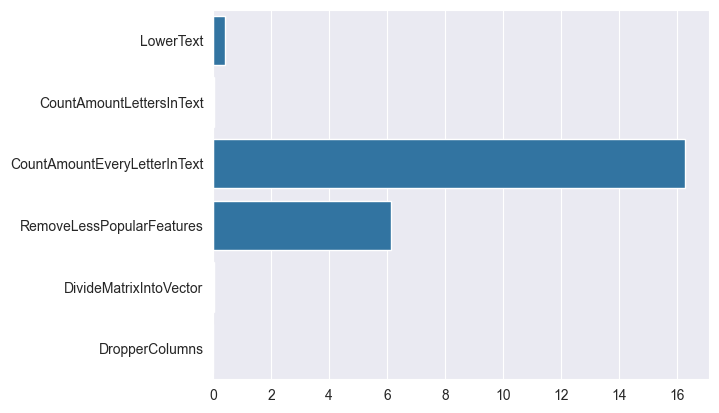

In [6]:
sns.barplot(y=entities_data.spend_time_for_transform_dic.keys(), x=entities_data.spend_time_for_transform_dic.values());

In [7]:
X.corrwith(y).sort_values()

h    -0.463122
’    -0.322575
     -0.315077
w    -0.254368
1    -0.232994
3    -0.225477
)    -0.213741
(    -0.213257
2    -0.199488
9    -0.193392
5    -0.189526
4    -0.187352
0    -0.183352
7    -0.177527
8    -0.174051
6    -0.173876
b    -0.169635
y    -0.140541
t    -0.103418
j    -0.092196
"    -0.070366
?    -0.045666
z    -0.033515
k    -0.032902
o    -0.028244
d    -0.012916
.    -0.009118
e    -0.002864
:     0.000689
m     0.021014
f     0.031983
q     0.046854
g     0.060378
x     0.086166
u     0.093533
\n    0.094636
-     0.111632
'     0.112946
s     0.119820
p     0.120119
a     0.135439
r     0.156526
l     0.162845
v     0.192681
i     0.240079
n     0.247596
,     0.270937
c     0.299255
dtype: float64

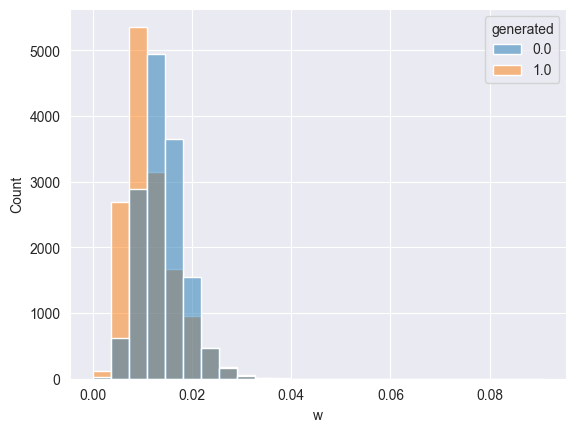

In [10]:
sns.histplot(x=X['w'], hue=y, bins=25);

In [20]:
import joblib

joblib.dump(pipe, 'pipeline.joblib')

['pipeline.joblib']

In [23]:
result_df = pd.concat([X, y], axis=1)
result_df

,?,q,n,.,e,o,u,:,6,8,...,h,3,z,0,(,"""",9,x,i,generated
4958,0.000000,0.000776,0.046289,0.012930,0.101112,0.048099,0.021722,0.000000,0.0,0.000000,...,0.038790,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001810,0.058960,0.0
7323,0.000000,0.000871,0.062518,0.004574,0.091490,0.055257,0.024325,0.000290,0.0,0.000000,...,0.044002,0.000073,0.000653,0.000000,0.000145,0.000000,0.0,0.000944,0.066294,0.0
26293,0.003171,0.000000,0.047040,0.009514,0.105708,0.057611,0.018499,0.000000,0.0,0.000000,...,0.043869,0.000000,0.001586,0.000000,0.000000,0.000000,0.0,0.004228,0.056554,1.0
25681,0.001031,0.000000,0.051546,0.012887,0.093299,0.067010,0.027320,0.000515,0.0,0.000515,...,0.033505,0.000000,0.000000,0.000000,0.000000,0.002062,0.0,0.000000,0.065464,1.0
27737,0.000000,0.000520,0.060291,0.009875,0.097193,0.062890,0.029626,0.000000,0.0,0.000000,...,0.032744,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001040,0.060811,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,0.000000,0.000662,0.057266,0.007282,0.119828,0.070175,0.016551,0.000000,0.0,0.000331,...,0.060576,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001324,0.044025,0.0
2373,0.000000,0.002387,0.066826,0.008115,0.108353,0.061098,0.020525,0.000477,0.0,0.000000,...,0.034845,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.002387,0.068735,1.0
28114,0.000629,0.000000,0.066709,0.008181,0.108244,0.059157,0.025802,0.000000,0.0,0.000000,...,0.034613,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000629,0.051605,1.0
12273,0.000000,0.000599,0.064110,0.008987,0.104853,0.056321,0.017975,0.000000,0.0,0.000000,...,0.043739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004194,0.051528,1.0


In [24]:
result_df.to_csv('./data_output/df_after_feature_engineering.csv')

In [25]:
#_ = joblib.load('pipeline.joblib')

In [28]:
#_.transform(df_sam)